# KMean clustering unsupervised iris

In [27]:
import pandas as pd 
from sklearn.datasets import load_iris

In [28]:
iris=load_iris()
dir(iris)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [30]:
df.drop(df[['sepal length (cm)','sepal width (cm)']],axis='columns',inplace=True)


In [31]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [32]:
 import matplotlib.pyplot as plt

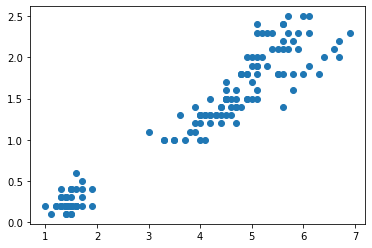

In [33]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
ms=MinMaxScaler()

In [36]:
ms.fit(df[['petal length (cm)']])

MinMaxScaler()

In [37]:
df['petal length (cm)']=ms.transform(df[['petal length (cm)']])

In [38]:
ms.fit(df[['petal width (cm)']])
df['petal width (cm)']=ms.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [39]:
from sklearn.cluster import KMeans 

In [40]:
model=KMeans(n_clusters=2)

In [41]:
y_predicted=model.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [42]:
df['cluster']=y_predicted

In [43]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [44]:
df1=df[df['cluster']==1]

In [45]:
df2=df[df['cluster']==0]

In [46]:
c=model.cluster_centers_
c

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

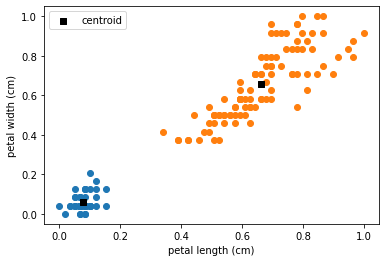

In [47]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(c[:,0],c[:,1], color='black',marker='s',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()



In [48]:
sse=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(df[['petal length (cm)']],df[['petal width (cm)']])
    sse.append(model.inertia_)
print(sse)

C:\Users\Aditya Ware\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[13.338850904912368, 1.9420778923288327, 0.7084355277936203, 0.36131890580612214, 0.24979074045707847, 0.16963218600931707, 0.12192083068998756, 0.0978609823819001, 0.07272838573689154]


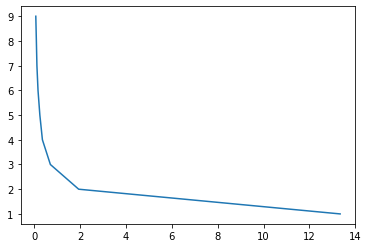

In [49]:
plt.plot(sse,[1,2,3,4,5,6,7,8,9])